In [1]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2020-10-24 21:23:24--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2020-10-24 21:23:25 (22.9 MB/s) - ‘iris.csv’ saved [3716/3716]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Perceptron:
    """Классификатор на основе персепртона
       
       Параметры
       ----------
         eta  : float => темп обучения [0,1]
       epochs :  int  => проходы по тренировочному набору данных в случае не сходимости
       ----------
       Атрибуты
       --------
          w_  : одномерный массив => весовые коэффициенты
       errors :      список       => число случаев ошибочной классификации в каждой эпохе
       --------
       """
    
    def __init__(self, eta = .01, epochs = 10):
        self.eta = eta
        self.epochs = epochs
    
    
    def net_input(self, X):
        """Расчет чистого входа"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        """Возрат метки класса после едичного скачка"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

    def fit(self, X, y) -> object:
        """Подгонка модели под тренировачные данные
            
           Параметры
           ---------
           X : [множество обьектов, множество фич]
           y : [целевая переменная]
           ---------
           """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.epochs):
            
            errors = 0
            
            for xi, yi in zip(X, y):
                
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int(update != 0.0)
                if errors == 0: break
            
            self.errors_.append(errors)
            
        return self

In [4]:
data = pd.read_csv('iris.csv', header=None)
data.head()

,0,1,2,3,4
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


In [5]:
data.iloc[0, 4]

'species'

In [6]:
y = data.iloc[1:100, 4].values
y[:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [7]:
y = np.where(y == 'setosa', -1, 1)
y[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [8]:
X = data.iloc[1:100, [0,2]].values.astype(float)
X[:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

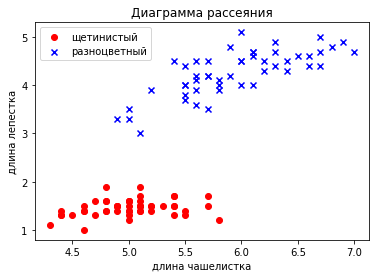

In [9]:
plt.scatter(X[:50, 0], X[:50, 1],
            color ='red', marker = 'o', label = 'щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистка')
plt.ylabel('длина лепестка')
plt.title('Диаграмма рассеяния')
plt.legend(loc = 'upper left')
plt.show();

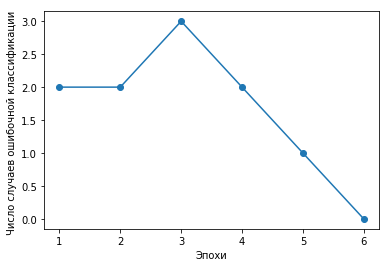

In [10]:
ppn = Perceptron(eta=0.1, epochs=6)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1) , ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случаев ошибочной классификации ')
plt.show();

In [11]:
set([i[0] for i in data.iloc[:, [4]].values])

{'setosa', 'species', 'versicolor', 'virginica'}

In [12]:
ppn.predict(data.iloc[1, [1,3]].values.astype(float))

array(-1)

In [13]:
data.iloc[1, 4]

'setosa'

In [14]:
ppn.w_

array([-0.4 , -0.68,  1.82])